# Sales Forecasting

## Importing Libraries

In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [48]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/sale forecasting.csv')
df.shape

(4384, 10)

In [49]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [51]:
df.describe()


,Units Sold,Price,Revenue,Discount,Units Returned
count,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,150.200274,34.781229,5226.569446,0.124398,1.531478
std,12.396099,14.198309,2192.491946,0.071792,1.258479
min,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,158.000000,46.712500,7009.960000,0.190000,2.000000
max,194.000000,59.970000,10761.850000,0.250000,8.000000


## Data Preprocessing

In [52]:
# handling null values
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [53]:
# handling duplicate values
df.duplicated().sum()

np.int64(0)

In [54]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['Date', 'Product Name', 'Category', 'Location', 'Platform']


In [55]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

df.drop(columns=['Date'], inplace=True)


In [56]:
freq_map = df['Product Name'].value_counts()
df['Product Name'] = df['Product Name'].map(freq_map)


In [57]:
loc_freq = df['Location'].value_counts()
df['Location'] = df['Location'].map(loc_freq)


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Platform'] = le.fit_transform(df['Platform'])


In [60]:
df = pd.get_dummies(df, columns=['Category'], drop_first=True)


In [61]:
# Handling Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: []


In [62]:
df.head()

,Product Name,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Year,Month,...,DayOfWeek,Category_Fat Burner,Category_Herbal,Category_Hydration,Category_Mineral,Category_Omega,Category_Performance,Category_Protein,Category_Sleep Aid,Category_Vitamin
0,274,143,31.98,4573.14,0.03,2,1507,1,2020,1,...,0,False,False,False,False,False,False,True,False,False
1,274,139,42.51,5908.89,0.04,0,1475,0,2020,1,...,0,False,False,False,False,False,False,False,False,True
2,274,161,12.91,2078.51,0.25,0,1507,0,2020,1,...,0,False,False,False,False,True,False,False,False,False
3,274,140,16.07,2249.80,0.08,0,1507,1,2020,1,...,0,False,False,False,False,False,False,False,False,True
4,274,157,35.47,5568.79,0.25,3,1507,2,2020,1,...,0,False,False,False,False,False,True,False,False,False


In [63]:
import numpy as np
from sklearn.preprocessing import StandardScaler

numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling.remove('Revenue')  # target column

scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])

print("Columns after processing:", df.columns.tolist())
display(df.head())

Columns after processing: ['Product Name', 'Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned', 'Location', 'Platform', 'Year', 'Month', 'Day', 'DayOfWeek', 'Category_Fat Burner', 'Category_Herbal', 'Category_Hydration', 'Category_Mineral', 'Category_Omega', 'Category_Performance', 'Category_Protein', 'Category_Sleep Aid', 'Category_Vitamin']


,Product Name,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Year,Month,...,DayOfWeek,Category_Fat Burner,Category_Herbal,Category_Hydration,Category_Mineral,Category_Omega,Category_Performance,Category_Protein,Category_Sleep Aid,Category_Vitamin
0,0.0,-0.580916,-0.197316,4573.14,-1.315034,0.372335,1.016335,-0.007203,-1.41221,-1.511868,...,0.0,False,False,False,False,False,False,True,False,False
1,0.0,-0.903635,0.544407,5908.89,-1.175727,-1.217067,0.282939,-1.221772,-1.41221,-1.511868,...,0.0,False,False,False,False,False,False,False,False,True
2,0.0,0.871319,-1.540587,2078.51,1.749735,-1.217067,1.016335,-1.221772,-1.41221,-1.511868,...,0.0,False,False,False,False,True,False,False,False,False
3,0.0,-0.822955,-1.318000,2249.80,-0.618496,-1.217067,1.016335,-0.007203,-1.41221,-1.511868,...,0.0,False,False,False,False,False,False,False,False,True
4,0.0,0.548600,0.048516,5568.79,1.749735,1.167036,1.016335,1.207366,-1.41221,-1.511868,...,0.0,False,False,False,False,False,True,False,False,False


## Training and Evaluation

In [64]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [67]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, rf_pred),
        r2_score(y_test, xgb_pred)
    ],
    "MAE": [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, rf_pred),
        mean_absolute_error(y_test, xgb_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, rf_pred)),
        np.sqrt(mean_squared_error(y_test, xgb_pred))
    ]
})

results


,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.993730,118.311096,170.189502
1,Random Forest,0.999249,31.351079,58.899920
2,XGBoost,0.999563,33.265560,44.911775


## Plots and Analysis

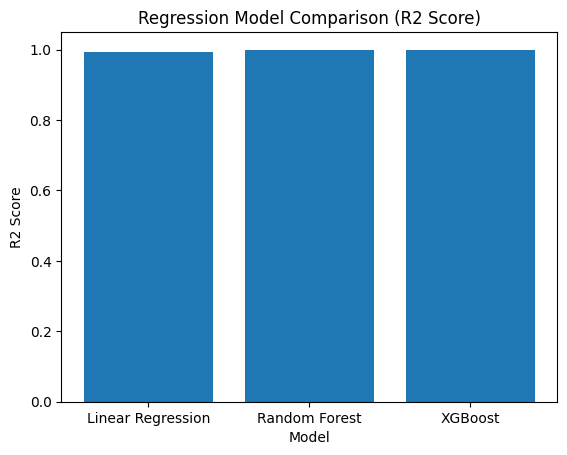

In [69]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results["Model"], results["R2 Score"])
plt.title("Regression Model Comparison (R2 Score)")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()


Thanks